In [1]:
import math
import datasets
import IBM1 as ibm1
import debug_helpers
import convergence_criterion as cc
import persistence
import plots
import evaluate

# pretty print variabeles on line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def fname_ibm1(i):
    return f'ibm1_iter_{i}.txt'

# After each iteration we print llhood and AER and store the model 
# We can later load the models that meet our convergence criteria
# and apply those to the test data
def fn_after_iter_ibm1(i, lprobs, log_likelihood, AER):
    debug_helpers.print_likelihood(i, lprobs, log_likelihood, AER)
    if i > 0:
        persistence.save_ibm1_model(lprobs, fname_ibm1(i))
        
# Run EM on training data set with AER on validation set
def IBM1_Train(s_t_pairs, s_vocabulary, t_vocabulary):
    val_sentence_pairs = datasets.validation_data(s_vocabulary, t_vocabulary)
    reference_alignments = datasets.validation_alignments()    
    (lprobs, log_lhoods, AERs) = ibm1.EM(
        s_t_pairs, s_vocabulary, t_vocabulary, 16,
        val_sentence_pairs, reference_alignments, 
        debug_helpers.print_likelihood
    ) 
    return (lprobs, log_lhoods, AERs)

iteration    log_likelihood    AER    time
0 -47715574.425 0.93012 06:33
1 -23150550.324 0.37465 06:35
2 -20164303.098 0.33651 06:38
3 -19252958.102 0.32792 06:40
4 -18942789.959 0.32854 06:42
5 -18804003.582 0.33046 06:45
6 -18730535.340 0.33238 06:47
7 -18687243.803 0.33205 06:49
8 -18659738.337 0.32982 06:52
9 -18641223.766 0.32663 06:54
10 -18628179.117 0.32088 06:56
11 -18618637.914 0.31992 06:58
12 -18611442.429 0.31992 07:01
13 -18605878.462 0.31757 07:03
14 -18601487.660 0.31726 07:05
15 -18597962.686 0.31823 07:08


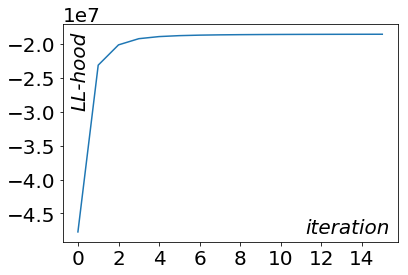

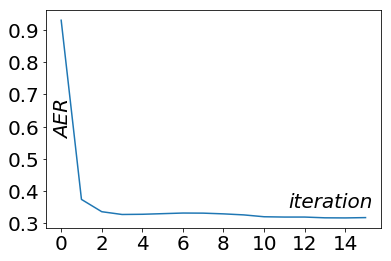

In [3]:
# train model
s_t_pairs, s_vocabulary, t_vocabulary = datasets.training_data()
(lprobs, llhoods, AERs) = IBM1_Train(s_t_pairs, s_vocabulary, t_vocabulary)

# plot AER and llhood scores vs iteration
plots.figure_log_likelihood(llhoods, 'IBM1_LOW')
plots.figure_AER(AERs, 'IBM1_LOW')

# select models based on AER and llhood selection criterion
selected_model_AER = fname_ibm1(cc.select_model_AER(AERs))
selected_model_llhood = fname_ibm1(cc.select_model_LLhood(llhoods))
print('model selected on AER:', selected_model_AER)
print('model selected on LLhood:', selected_model_llhood)

# store AER and llhood scores in file
fname_ibm1_AERs = "ibm1_AERs_iter15.txt"    
fname_ibm1_llhoods = "ibm1_llhoods_iter15.txt"
persistence.save(AERs, fname_ibm1_AERs)
persistence.save(llhoods, fname_ibm1_llhoods)

#persistence.load(fname_ibm1_AERs)
#persistence.load(fname_ibm1_llhoods)

In [ ]:
def evaluate_IBM1_model(test_sentence_pairs, path_to_model, model_name):
    lprobs = persistence.load_ibm1_model(path_to_model)
    alignments = ibm1.align(lprobs, test_sentence_pairs)
    evaluate.evaluate_alignments_testset(model_name, alignments)    
    
test_sentence_pairs = test_data(s_vocabulary, t_vocabulary)

model_name_AER = 'IBM1_AER'
selected_model_AER = 'ibm1_iter_5.txt'
evaluate_IBM1_model(test_sentence_pairs, selected_model_AER, model_name_AER)

model_name_llhood = 'IBM1_LLHood'
selected_model_llhood = 'ibm1_iter_9.txt'
evaluate_IBM1_model(test_sentence_pairs, selected_model_llhood, model_name_llhood)